k-means algorithm is very popular clustering algorithm. It works as follows:

Choose k centroids of clusters randomly (k must be given)
Assign each data point to same cluster as its closest centroid
Update centroids to be the means of data points within same cluster
Repeat 2 and 3 until no changes occur
 

The algorithm is quite simple and it only needs to compute distances to centroids and means of data points' clusters. Therefore we illustrate the its basic working in python next. Later we will resort to sklearn which readily provides the same algorithm (but with more robust implementation).

 

Start with same sample data, k=3 and random centroids



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame({
'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
k = 3
cols = {0: 'r', 1: 'g', 2: 'b'}

np.random.seed(200)

C = np.zeros((k,2),dtype="int64")
for i in range(k):
    C[i,0] = np.random.randint(0, 80)
    C[i,1] = np.random.randint(0, 80)

In [5]:
C

array([[26, 16],
       [68, 42],
       [55, 76]])

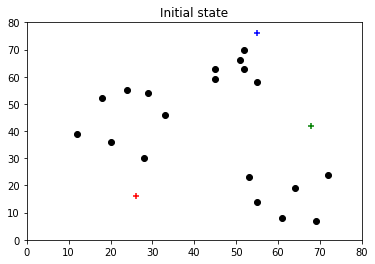

In [6]:
plt.scatter(df['x'], df['y'], color='k')
for i in range(k):
    plt.scatter(C[i,0],C[i,1],color=cols[i],marker="+")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.title("Initial state")
plt.show()

In [7]:
#assigning each data point to a cluster (indicated by closest centroid)
def assignment(df,C,cols):
    

    d0 = np.sqrt((np.array(df['x']) - C[0,0]) ** 2 + (np.array(df['y']) - C[0,1]) ** 2)
    d1 = np.sqrt((np.array(df['x']) - C[1,0]) ** 2 + (np.array(df['y']) - C[1,1]) ** 2)
    d2 = np.sqrt((np.array(df['x']) - C[2,0]) ** 2 + (np.array(df['y']) - C[2,1]) ** 2)

    d = np.vstack((d0,d1,d2))   
    #Stack arrays in sequence vertically (row wise).
    cl = d.argmin(axis=0)      
    #Returns the indices of the minimum values along an axis.(Retutn the index of the minmum value)
    #axis=0 means return the index of minmum value in each column
    #when axis argument not given, function will return the index of the minmum value in all matrix ( as 1-D array)
    df['closest'] = cl

    df['color'] = df['closest'].map(lambda x: cols[x])
    return df

pandas dataframe containing x and y coordinates is expanded by closest cluster index (0,1,2) and color representing that cluster.


  
In main program we assign data points once to clusters and plot the results.

     x   y  closest color
0   12  39        0     r
1   20  36        0     r
2   28  30        0     r
3   18  52        0     r
4   29  54        2     b
5   33  46        0     r
6   24  55        2     b
7   45  59        2     b
8   45  63        2     b
9   52  70        2     b
10  51  66        2     b
11  52  63        2     b
12  55  58        2     b
13  53  23        1     g
14  55  14        0     r
15  61   8        1     g
16  64  19        1     g
17  69   7        1     g
18  72  24        1     g


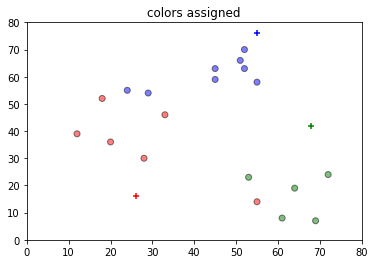

In [8]:
df = assignment(df,C,cols)
print(df)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in range(k):
    plt.scatter(C[i,0],C[i,1], color=cols[i],marker="+")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.title("colors assigned")
plt.show()

Note one red dot near the green ones and two blue dots near the red ones. Next we update the centroids to be in the mean positions of their respective clusters. We do that also inside a helper function.

In [16]:
def update(C):
    k = np.shape(C)[0]
    for i in range(k):
        C[i,0] = np.mean(df[df['closest'] == i]['x'])
        C[i,1] = np.mean(df[df['closest'] == i]['y'])
    return C

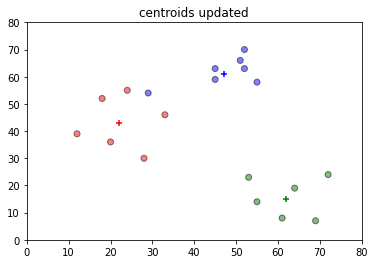

In [17]:
C = update(C)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in range(k):
    plt.scatter(C[i,0],C[i,1], color=cols[i],marker="+")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.title("centroids updated")
plt.show()

     x   y  closest color
0   12  39        0     r
1   20  36        0     r
2   28  30        0     r
3   18  52        0     r
4   29  54        2     b
5   33  46        0     r
6   24  55        0     r
7   45  59        2     b
8   45  63        2     b
9   52  70        2     b
10  51  66        2     b
11  52  63        2     b
12  55  58        2     b
13  53  23        1     g
14  55  14        1     g
15  61   8        1     g
16  64  19        1     g
17  69   7        1     g
18  72  24        1     g


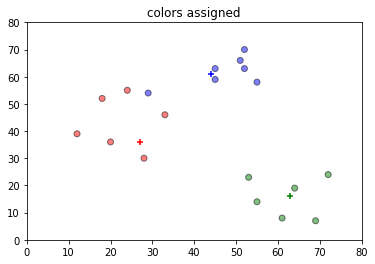

In [11]:
df = assignment(df, C,cols)
print(df)

# Plot results
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in range(k):
    plt.scatter(C[i,0],C[i,1], color=cols[i],marker="+")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.title("colors assigned")
plt.show()